In [145]:
import nltk
from nltk.tokenize import *
import pandas as pd
import numpy as np
import json
import csv
import re
from nltk import *
import string

import seaborn as sns
import matplotlib.pyplot as plt


In [146]:
PreText = []
for line in open(r'covidhealth.json',encoding = 'utf-8'):
    PreText.append(json.loads(line))

In [147]:
N = pd.json_normalize(PreText)

In [148]:
#N.head()

In [149]:
text_csv = N.to_csv("newtext.csv",index = None)

In [150]:
columns = ["text"]
covid_data = N[columns]


In [151]:
#N.head()


In [152]:
# Remove punctuations
def no_punc(N):
    no_punc = [w for w in N if w not in '"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~“”’—']
    no_puncText = ''.join(no_punc)
    return no_puncText
N['no_punc'] = N['text'].apply(lambda x: no_punc(x))


In [153]:
N['no_punc'].head()

0    Bengaluru Isolation wards in hospitals across ...
1    The government making sure that the new corona...
2    Apart from more people falling sick as bad as ...
3    Asian stock markets are mostly higher on Frida...
4    Cash flow was also very strong at more than US...
Name: no_punc, dtype: object

In [154]:
from nltk.tokenize import sent_tokenize

In [155]:
N["sentence_tokenized"] = N["no_punc"].apply(sent_tokenize)

In [156]:
list_of_sentence = []
for sentence in N["sentence_tokenized"]:
    for sent in sentence:
        list_of_sentence.append(sent)

In [157]:
len(list_of_sentence)

249771

In [158]:
sensen = list_of_sentence[:4000]

In [159]:
sensen

['Bengaluru Isolation wards in hospitals across Karnataka and helpline to take calls on coronavirusrelated queries are ready to prevent any further spread of the virus after the first case in India was reported from Kerala yesterday.',
 'The Chief Secretary of the state government on Thursday held a meeting with the Additional Chief Secretary Health Health Commissioner Mission Director of the National Health Mission and other health department officials and reviewed the state preparedness to tackle any cases of coronavirus whenever reported.',
 'Rajiv Gandhi Institute of Chest Diseases RGICD with 15 beds and Wenlock Hospital at Mangaluru with 10 beds have been selected for the treatment of the virus.',
 'All district hospitals will have five beds isolated for patients carrying the virus.',
 'Along with this at least ten private hospitals in Bengaluru will be setting up similar isolation wards.',
 'The National Institute of Virology and the Viral Research and Diagnostic Laboratory at th

In [160]:
AdjSENT = []


In [161]:
for i in range(0,len(sensen)):
    sen = word_tokenize(sensen[i])
    tag = nltk.pos_tag(sen)
    grammar = RegexpParser("""ADJP: {<RB>+<JJ> | <JJ><IN>+ }""")
    tree = grammar.parse(tag)
    tag2 = tree.pos()
    
    
    T = []
    
    for j in range(0, len(tag2)):
        if tag2[j][1] == "ADJP":
            T.append(tag2[j][0][0])
    
    
    if len(T) == 0:
        continue
    else:
        T2 = ' '.join(T)
        T3 = (T2,'Adjective Phrase')
        
        
        AdjSENT.append(T3)

In [162]:
#likst of adjective phrases by frequency
List_of_Adj_Phrases = FreqDist(AdjSENT)
List_of_Adj_Phrases.most_common(50)

[(('such as', 'Adjective Phrase'), 30),
 (('positive for', 'Adjective Phrase'), 9),
 (('many of', 'Adjective Phrase'), 5),
 (('too early', 'Adjective Phrase'), 5),
 (('sure that', 'Adjective Phrase'), 4),
 (('confident that', 'Adjective Phrase'), 4),
 (('potential for', 'Adjective Phrase'), 4),
 (('so many', 'Adjective Phrase'), 4),
 (('responsible for', 'Adjective Phrase'), 4),
 (('unwell in', 'Adjective Phrase'), 3),
 (('late last', 'Adjective Phrase'), 3),
 (('aware of', 'Adjective Phrase'), 3),
 (('free of', 'Adjective Phrase'), 3),
 (('not able', 'Adjective Phrase'), 3),
 (('not likely', 'Adjective Phrase'), 3),
 (('capable of', 'Adjective Phrase'), 3),
 (('as high', 'Adjective Phrase'), 3),
 (('familiar with', 'Adjective Phrase'), 3),
 (('high of', 'Adjective Phrase'), 2),
 (('as much', 'Adjective Phrase'), 2),
 (('open for', 'Adjective Phrase'), 2),
 (('understood that', 'Adjective Phrase'), 2),
 (('high that', 'Adjective Phrase'), 2),
 (('reportedly close', 'Adjective Phrase'),

In [163]:
#average length on sent
sum = 0
for i in range(0,len(AdjSENT)):
    sum = sum + len(AdjSENT[i])
Avg = sum/len(AdjSENT)


In [164]:
print(Avg)

2.0


In [165]:
N["tokenized_words"] = N["no_punc"].apply(word_tokenize)

In [166]:
list_of_words = []
for words in N["tokenized_words"]:
    for w in words:
        list_of_words.append(w)

In [167]:
hehe=list_of_words[:4000]

In [168]:
print(hehe)

['Bengaluru', 'Isolation', 'wards', 'in', 'hospitals', 'across', 'Karnataka', 'and', 'helpline', 'to', 'take', 'calls', 'on', 'coronavirusrelated', 'queries', 'are', 'ready', 'to', 'prevent', 'any', 'further', 'spread', 'of', 'the', 'virus', 'after', 'the', 'first', 'case', 'in', 'India', 'was', 'reported', 'from', 'Kerala', 'yesterday', '.', 'The', 'Chief', 'Secretary', 'of', 'the', 'state', 'government', 'on', 'Thursday', 'held', 'a', 'meeting', 'with', 'the', 'Additional', 'Chief', 'Secretary', 'Health', 'Health', 'Commissioner', 'Mission', 'Director', 'of', 'the', 'National', 'Health', 'Mission', 'and', 'other', 'health', 'department', 'officials', 'and', 'reviewed', 'the', 'state', 'preparedness', 'to', 'tackle', 'any', 'cases', 'of', 'coronavirus', 'whenever', 'reported', '.', 'Rajiv', 'Gandhi', 'Institute', 'of', 'Chest', 'Diseases', 'RGICD', 'with', '15', 'beds', 'and', 'Wenlock', 'Hospital', 'at', 'Mangaluru', 'with', '10', 'beds', 'have', 'been', 'selected', 'for', 'the', 'tr

In [169]:
from nltk import pos_tag
pos_tokens = pos_tag(hehe)

In [170]:
print(pos_tokens)

[('Bengaluru', 'NNP'), ('Isolation', 'NNP'), ('wards', 'NNS'), ('in', 'IN'), ('hospitals', 'NNS'), ('across', 'IN'), ('Karnataka', 'NNP'), ('and', 'CC'), ('helpline', 'NN'), ('to', 'TO'), ('take', 'VB'), ('calls', 'NNS'), ('on', 'IN'), ('coronavirusrelated', 'JJ'), ('queries', 'NNS'), ('are', 'VBP'), ('ready', 'JJ'), ('to', 'TO'), ('prevent', 'VB'), ('any', 'DT'), ('further', 'JJ'), ('spread', 'NN'), ('of', 'IN'), ('the', 'DT'), ('virus', 'NN'), ('after', 'IN'), ('the', 'DT'), ('first', 'JJ'), ('case', 'NN'), ('in', 'IN'), ('India', 'NNP'), ('was', 'VBD'), ('reported', 'VBN'), ('from', 'IN'), ('Kerala', 'NNP'), ('yesterday', 'NN'), ('.', '.'), ('The', 'DT'), ('Chief', 'NNP'), ('Secretary', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('state', 'NN'), ('government', 'NN'), ('on', 'IN'), ('Thursday', 'NNP'), ('held', 'VBD'), ('a', 'DT'), ('meeting', 'NN'), ('with', 'IN'), ('the', 'DT'), ('Additional', 'NNP'), ('Chief', 'NNP'), ('Secretary', 'NNP'), ('Health', 'NNP'), ('Health', 'NNP'), ('Commiss

In [171]:
# to get nouns,adjective words and verbs
Nounwords = []
Verbwords = []
Adjwords =[]


In [172]:
for abc in pos_tokens:
    if abc[1] == 'NN' and (abc[0].isalpha() or abc[0] == '!'):
        Nounwords.append(abc[0])
    elif abc[1] == 'VBD' and (abc[0].isalpha() or abc[0] == '!'):
        Verbwords.append(abc[0])
    elif abc[1] == 'JJ' and (abc[0].isalpha() or abc[0] == '!'):
        Adjwords.append(abc[0])

In [173]:
#top 50 nouns
List_of_Nouns = FreqDist(Nounwords)
List_of_Nouns.most_common(50)

[('virus', 20),
 ('coronavirus', 18),
 ('outbreak', 18),
 ('percent', 17),
 ('health', 16),
 ('cent', 13),
 ('emergency', 12),
 ('spread', 11),
 ('case', 8),
 ('password', 8),
 ('disease', 7),
 ('impact', 7),
 ('country', 6),
 ('market', 6),
 ('price', 6),
 ('stock', 5),
 ('trade', 5),
 ('travel', 5),
 ('demand', 5),
 ('target', 5),
 ('email', 5),
 ('city', 4),
 ('concern', 4),
 ('quarter', 4),
 ('year', 4),
 ('production', 4),
 ('note', 4),
 ('guidance', 4),
 ('week', 4),
 ('number', 4),
 ('flu', 4),
 ('risk', 4),
 ('man', 4),
 ('home', 4),
 ('declaration', 4),
 ('state', 3),
 ('government', 3),
 ('province', 3),
 ('capital', 3),
 ('cash', 3),
 ('period', 3),
 ('flow', 3),
 ('link', 3),
 ('account', 3),
 ('information', 3),
 ('statement', 3),
 ('deal', 3),
 ('economy', 3),
 ('event', 3),
 ('growth', 3)]

In [174]:
#top 50  verb words
List_of_Verbs = FreqDist(Verbwords)
List_of_Verbs.most_common(50)

[('was', 18),
 ('said', 13),
 ('had', 6),
 ('were', 5),
 ('reported', 4),
 ('did', 3),
 ('called', 3),
 ('added', 3),
 ('declared', 2),
 ('sent', 2),
 ('held', 1),
 ('reviewed', 1),
 ('noted', 1),
 ('digested', 1),
 ('met', 1),
 ('closed', 1),
 ('wrote', 1),
 ('cut', 1),
 ('rallied', 1),
 ('took', 1),
 ('surged', 1),
 ('raised', 1),
 ('declined', 1),
 ('dismissed', 1),
 ('mandated', 1),
 ('dont', 1),
 ('automated', 1),
 ('infected', 1),
 ('dethroned', 1),
 ('originated', 1),
 ('became', 1),
 ('made', 1),
 ('showed', 1),
 ('recommended', 1),
 ('confirmed', 1),
 ('arrived', 1),
 ('exceeded', 1),
 ('captor', 1),
 ('travelled', 1),
 ('prompted', 1),
 ('began', 1),
 ('described', 1),
 ('praised', 1),
 ('rose', 1),
 ('died', 1),
 ('cited', 1)]

In [175]:
#top 50 adjective words
List_of_Adjectivewords = FreqDist(Adjwords)
List_of_Adjectivewords.most_common(50)

[('global', 17),
 ('Chinese', 13),
 ('new', 10),
 ('other', 9),
 ('public', 8),
 ('Asian', 7),
 ('international', 7),
 ('first', 6),
 ('positive', 5),
 ('novel', 5),
 ('sick', 4),
 ('Australian', 4),
 ('major', 4),
 ('second', 4),
 ('last', 4),
 ('medical', 4),
 ('impressive', 4),
 ('gross', 4),
 ('deadly', 3),
 ('recent', 3),
 ('free', 3),
 ('good', 3),
 ('extraordinary', 3),
 ('further', 2),
 ('next', 2),
 ('sure', 2),
 ('fundamental', 2),
 ('dangerous', 2),
 ('weak', 2),
 ('much', 2),
 ('past', 2),
 ('clear', 2),
 ('electric', 2),
 ('automotive', 2),
 ('reasonable', 2),
 ('many', 2),
 ('understood', 2),
 ('website', 2),
 ('possible', 2),
 ('serious', 2),
 ('Domestic', 2),
 ('epidemic', 2),
 ('midJanuary', 2),
 ('likely', 2),
 ('acute', 2),
 ('respiratory', 2),
 ('main', 2),
 ('Canadian', 2),
 ('unprecedented', 2),
 ('able', 2)]

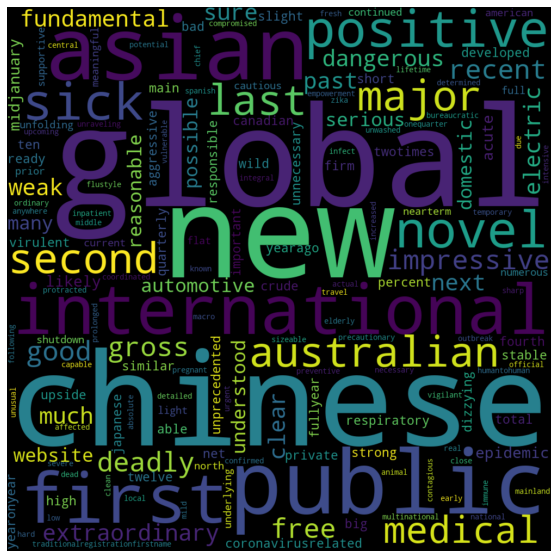

In [176]:
import nltk
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
words = " ".join(List_of_Adjectivewords)


def punctuation_stop(txt):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(txt)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

word_filtered = punctuation_stop(words)

text = " ".join([ele for ele in word_filtered])

wc = WordCloud(background_color = 'black', random_state = 1, stopwords = STOPWORDS, max_words = 2000, width = 1000, height = 1000)
wc.generate(text)

plt.figure(figsize = [10,10])
plt.imshow(wc,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [181]:
#bonus point?
N["new_title"] = N["title"].apply(word_tokenize)

In [184]:
list_of_titles = []
for words in N["new_title"]:
    for w in words:
        list_of_titles.append(w)

In [193]:
ttt= list_of_titles[:4000]